# PRJ-002: Diabetes 130-US Hospitals for Years 1999-2008 

In [1]:
admission_type_id={1:"Emergency", 2:"Urgent", 3:"Elective",4:"Newborn",5:"Not Available",6:"NULL",7:"Not Mapped"}

discharge_disposition_id = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab fac including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
    27: "Discharged/transferred to a federal health care facility.",
    28: "Discharged/transferred/referred to a psychiatric hospital or psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)."
}

admission_source_id = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critical access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}

dosage={0:"No",1:"Down",2:"Up",3:"Steady"}

## Import Libraries

In [2]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Import Data

In [6]:
df = pd.read_csv("diabetic_data.csv")


## Data Cleaning

Data header

In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Data features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

All rows seem to have no null values but it is incorrect. The null values are defined with a question mark. It should also be noted that there are several duplicates in the dataset. Which can be seen when looking at the dataset and ordering by 'patient_nbr' from lowest to highest.

Remove duplicates

In [8]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [ ]:
df.info()

### Removing Redundant Features
Some of the features are missing many values to make a significant difference and some are not useful e.g. 'patient_nbr'

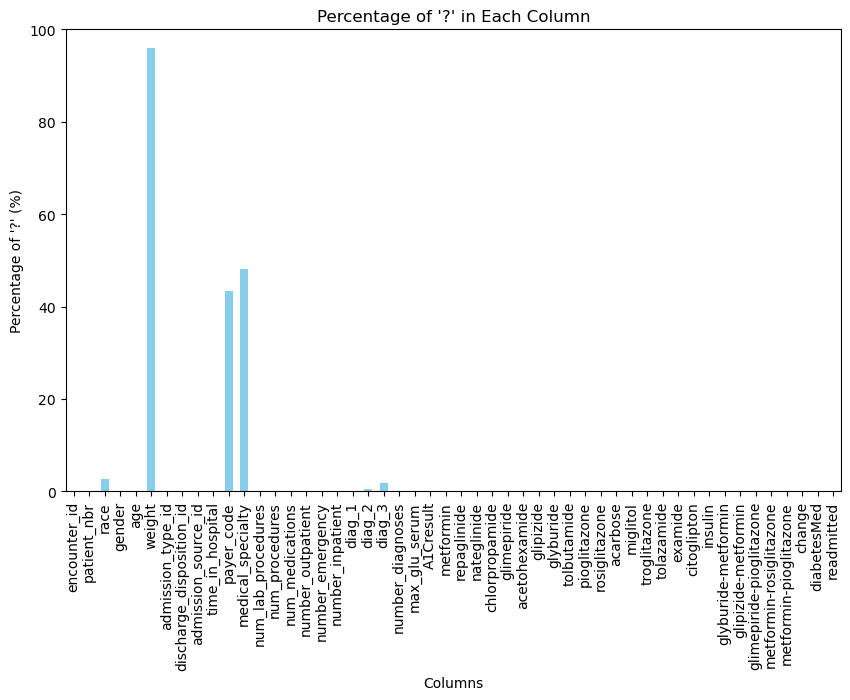

In [12]:

total_counts = df.shape[0]
question_mark_counts = df.apply(lambda col: col.astype(str).str.count(r'\?').sum())

# Calculate the percentage of '?' in each column
question_mark_percentage = (question_mark_counts / total_counts) * 100

# Plotting the results
plt.figure(figsize=(10, 6))
question_mark_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of '?' in Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of '?' (%)")
plt.ylim(0, 100)  # Set y-axis from 0 to 100% for clarity
plt.xticks(rotation=90)
plt.show()

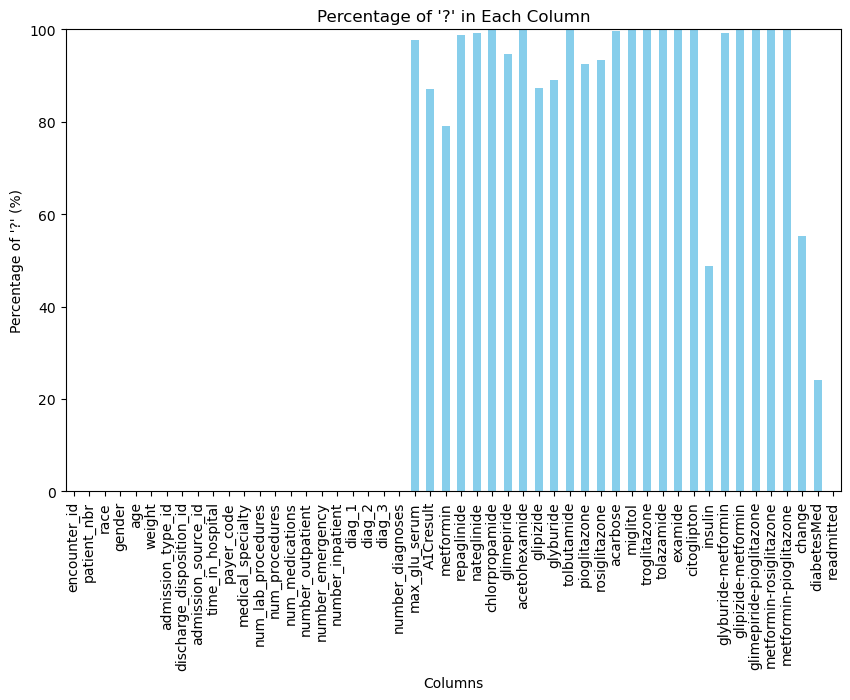

In [15]:
no_counts = df.apply(lambda col: col.astype(str).str.count(r'No').sum())

# Calculate the percentage of '?' in each column
no_percentage = (no_counts / total_counts) * 100

# Plotting the results
plt.figure(figsize=(10, 6))
no_percentage.plot(kind='bar', color='skyblue')
plt.title("Percentage of '?' in Each Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of '?' (%)")
plt.ylim(0, 100)  # Set y-axis from 0 to 100% for clarity
plt.xticks(rotation=90)
plt.show()

In [ ]:
drop_list= ['patient_nbr','weight']